In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
# import pandas as pd
from scipy.fft import fft

In [9]:
# Load data and print the classes
# TODO: change "gesture_dict.npy" to the filename of your exercise's posture data
data1 = np.load("Alejandro_gesture_dict.npy",allow_pickle=True)
data1.item().keys()


dict_keys(['Shoulder press Good', 'Shoulder press elbow flare', 'Shoulder press not full extension'])

In [10]:
data1.item().get('Shoulder press Good').pop(10)

array([[-385.742188,  372.070313,  935.546875, ...,   36.      ,
          -8.55    ,   23.700001],
       [-366.210938,  356.445313,  913.085938, ...,   35.549999,
          -9.45    ,   25.049999],
       [-364.257813,  358.398438,  905.273438, ...,   35.25    ,
          -8.55    ,   22.65    ],
       ...,
       [-479.492188,  430.664063,  789.0625  , ...,   37.5     ,
         -12.      ,   19.65    ],
       [-519.53125 ,  489.257813,  783.203125, ...,   36.75    ,
         -10.8     ,   18.6     ],
       [-478.515625,  450.195313,  787.109375, ...,   37.5     ,
         -12.75    ,   19.65    ]])

In [14]:
data2 = np.load("Amy_gesture_dict.npy",allow_pickle=True)
data2.item().keys()
data2.item().get('Shoulder press Good').pop(3)

array([[   7.8125  ,  363.28125 ,  888.671875,  266.113281, -382.324219,
         916.015625,  -83.381676,   13.229008,   28.717558,   -4.2     ,
          19.65    ,   22.950001, -676.757813, -177.734375,  693.359375,
         -35.206108,   69.778625,    3.40458 ,   26.1     ,  -29.85    ,
          16.049999],
       [  19.53125 ,  429.6875  ,  992.1875  ,  294.921875, -346.191406,
         794.433594,  -77.732826,   23.198473,   28.091602,   -4.05    ,
          19.200001,   22.35    , -786.132813, -210.449219,  664.0625  ,
         -54.435116,   75.290077,   -1.671756,   28.200001,  -31.799999,
          15.3     ],
       [ -37.109375,  456.054688, 1041.015625,  352.050781, -549.804688,
         871.582031,  -65.305344,   29.083969,   16.152672,   -4.05    ,
          19.200001,   22.35    , -854.980469, -239.746094,  572.265625,
         -61.893131,   82.977097,    3.251908,   29.4     ,  -32.25    ,
          13.95    ]])

In [16]:
data3 = np.load("gesture_dict_Nandini.npy",allow_pickle=True)
data3.item().keys()

dict_keys(['Shoulder press Good', 'Shoulder press elbow flare', 'Shoulder press not full extension'])

In [18]:
npdict = {**data1.item(), **data2.item(), **data3.item()}

# Save the combined dictionary to a new numpy file
np.save("combined_gesture_dict.npy", npdict)

In [20]:
data = np.load("combined_gesture_dict.npy",allow_pickle=True)
data.item().keys()

dict_keys(['Shoulder press Good', 'Shoulder press elbow flare', 'Shoulder press not full extension'])

Shoulder press Good (10, 125, 21)


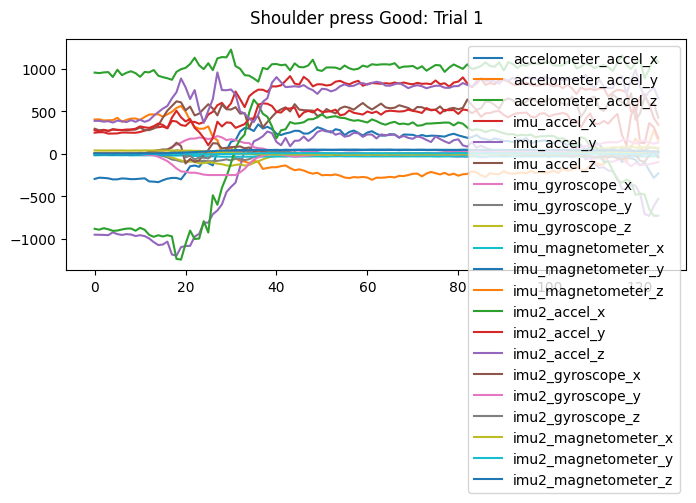

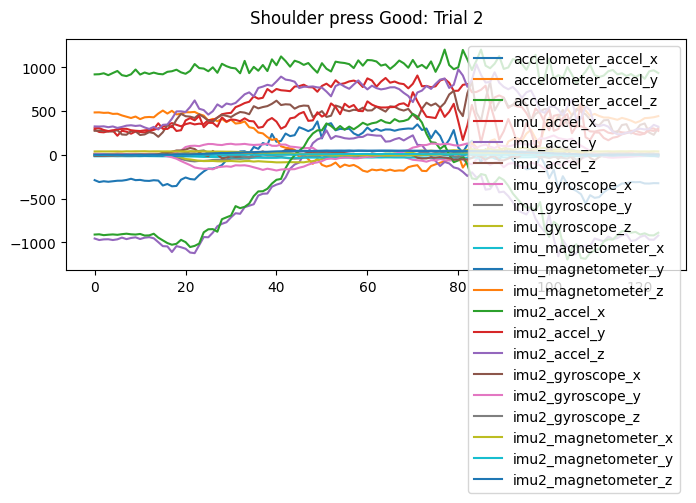

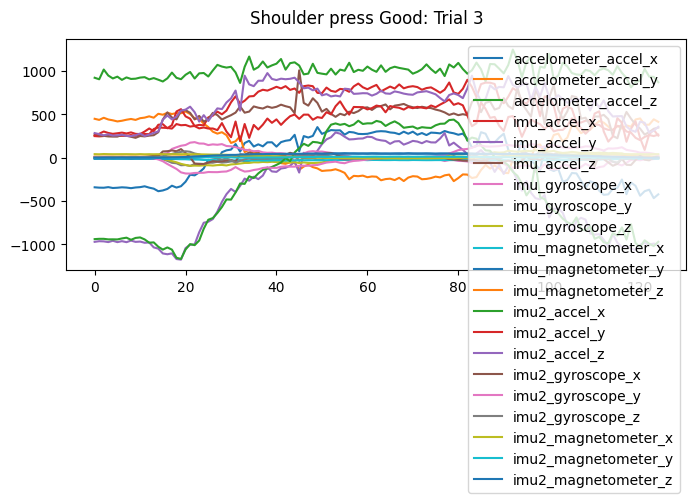

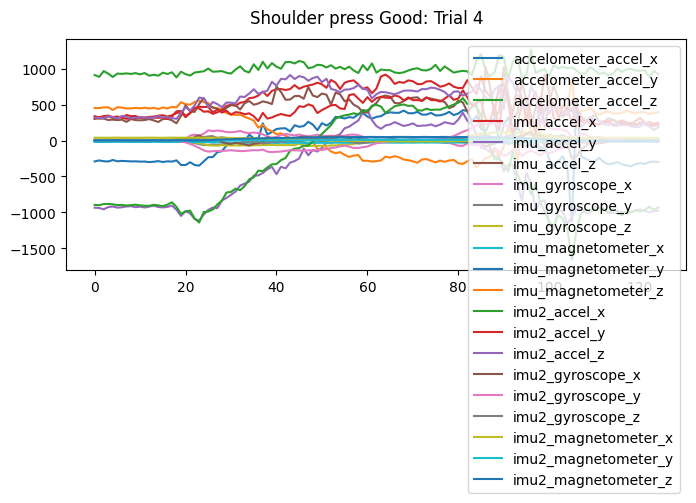

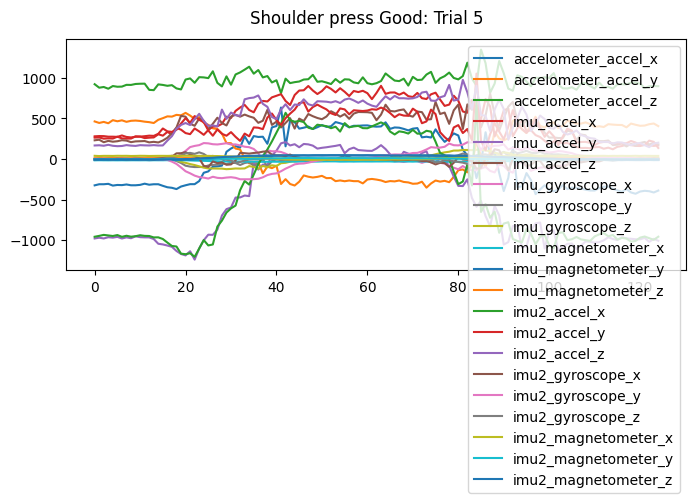

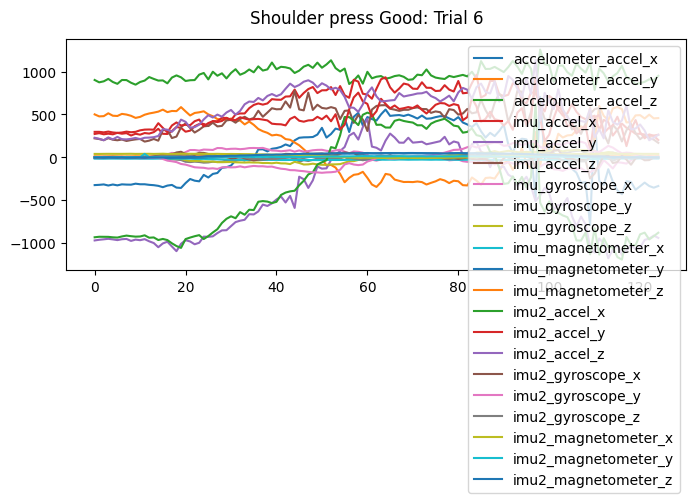

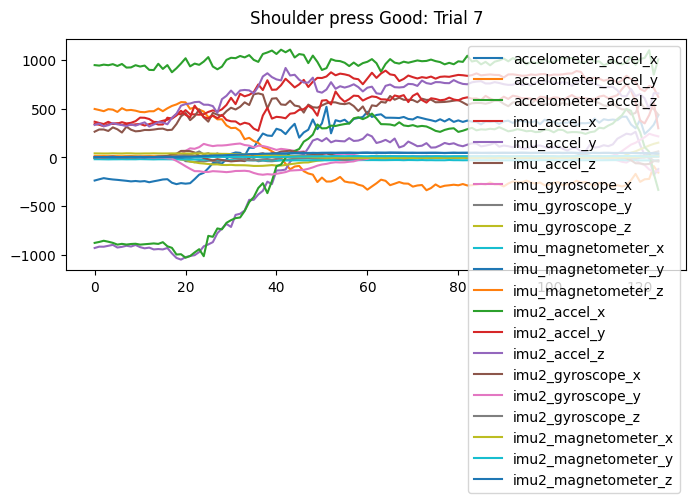

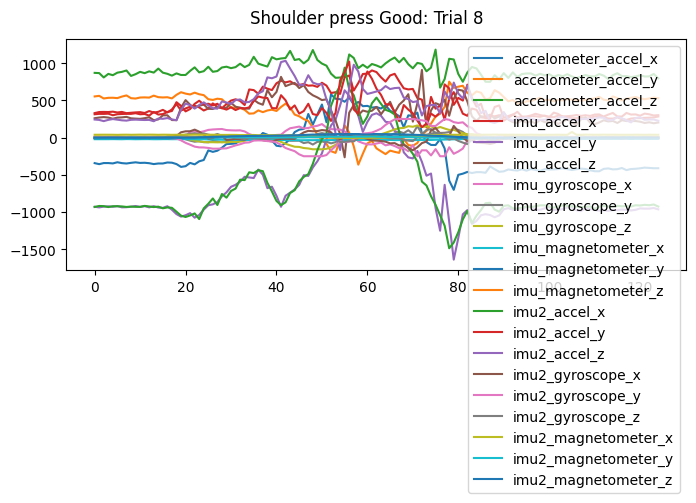

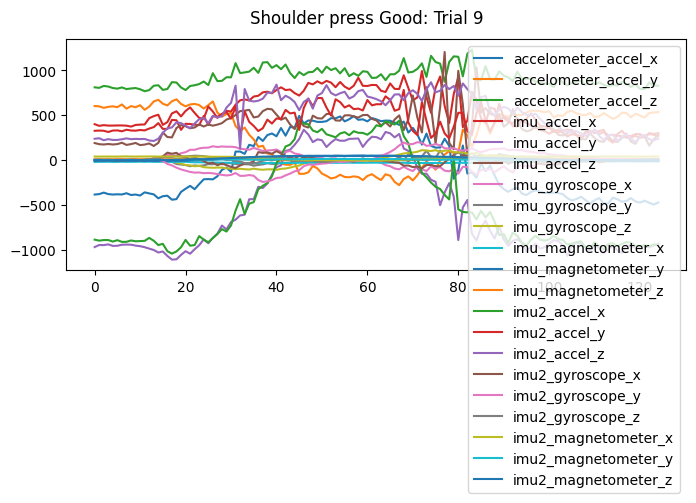

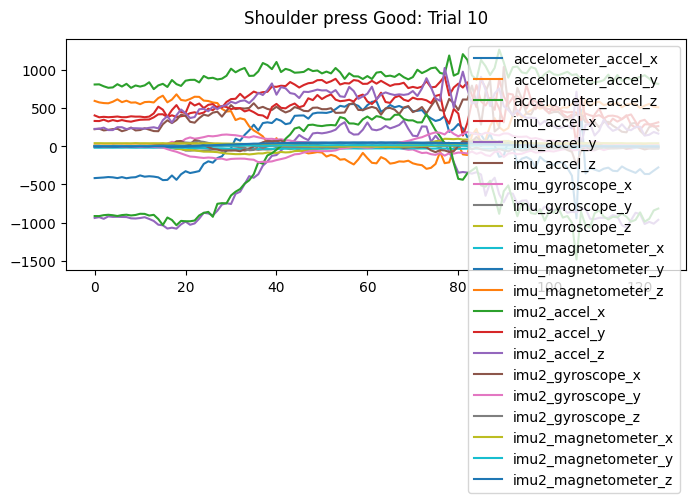

Shoulder press elbow flare (10, 125, 21)


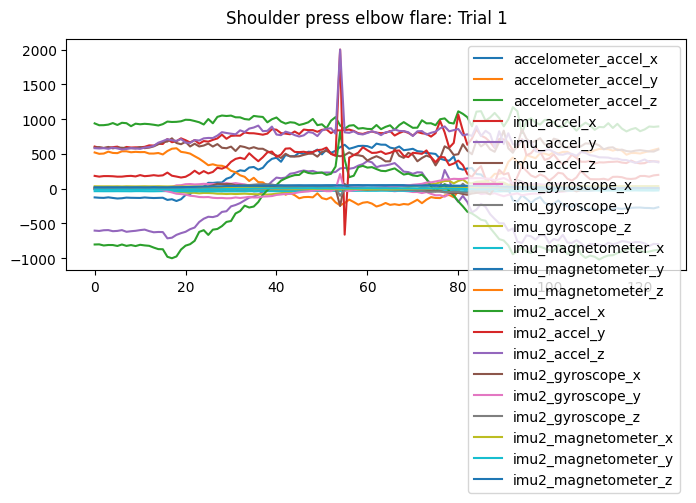

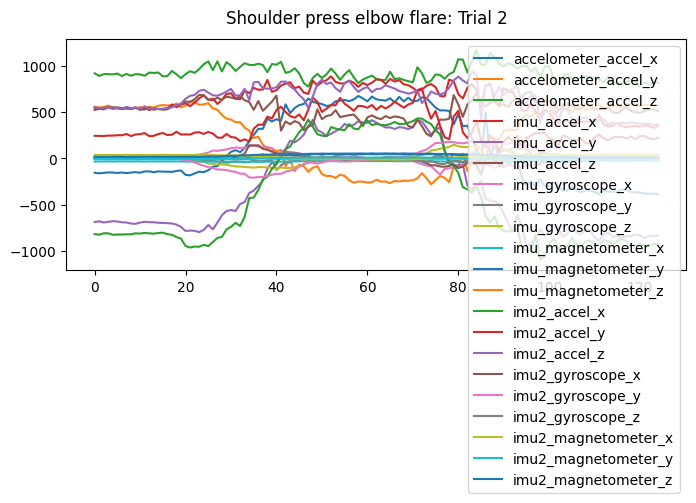

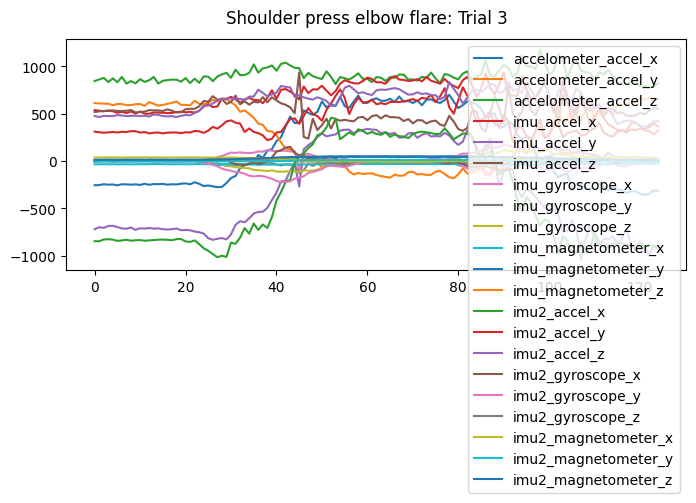

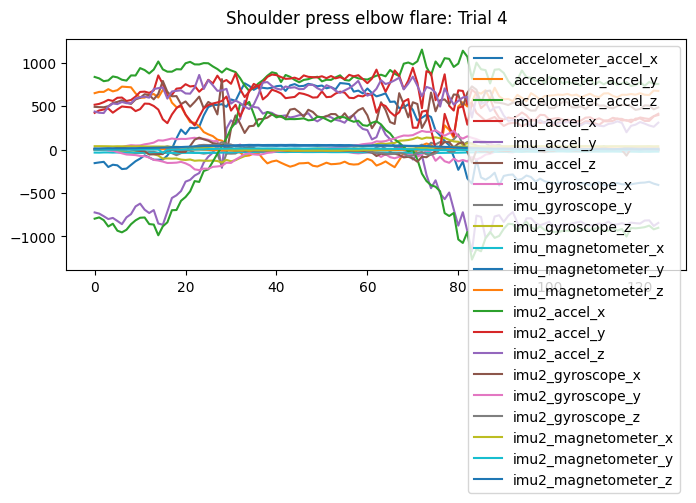

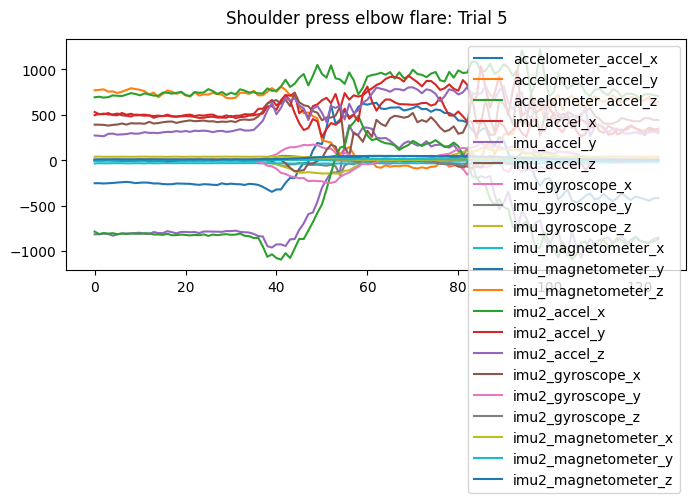

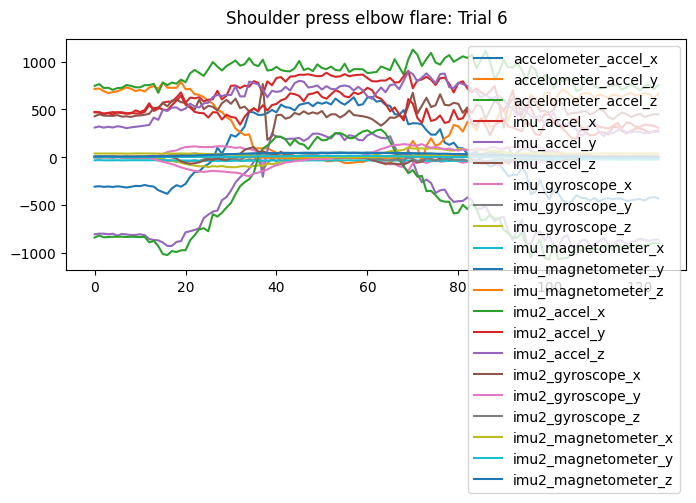

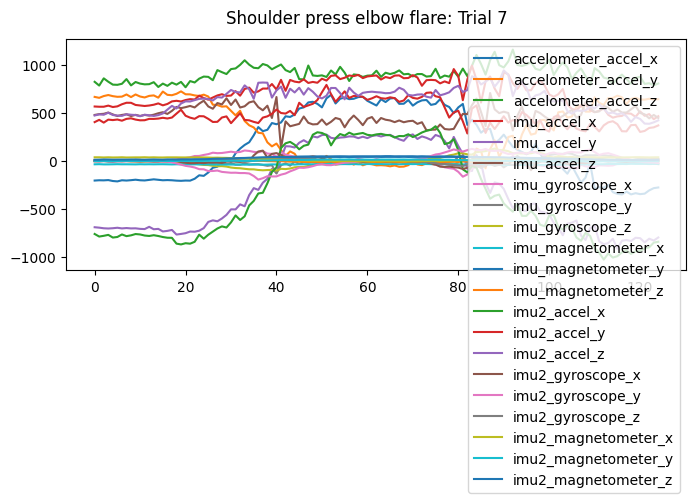

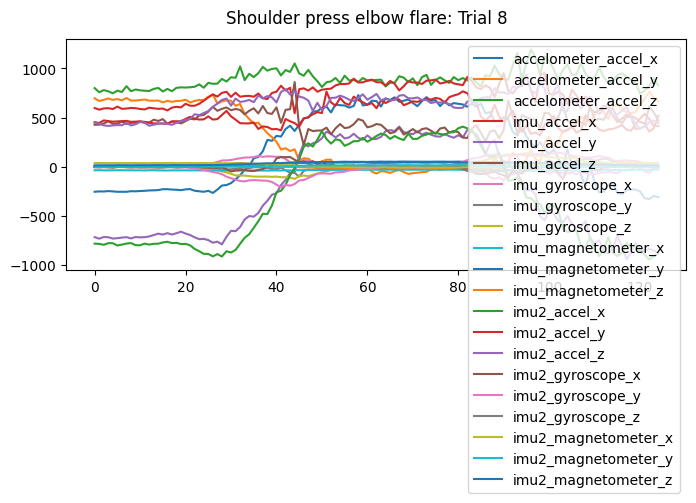

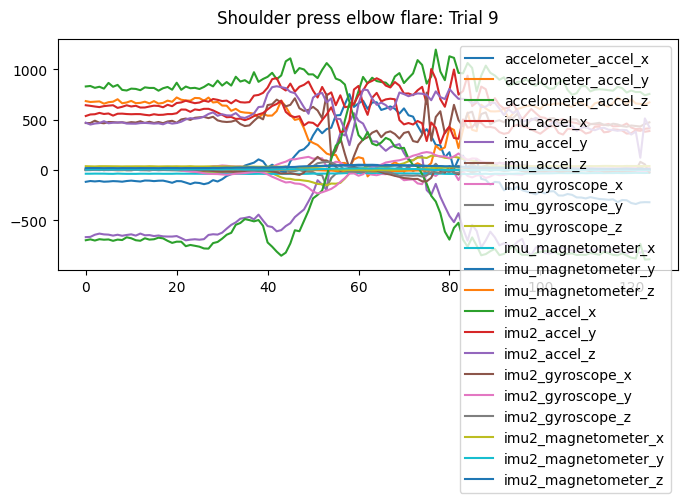

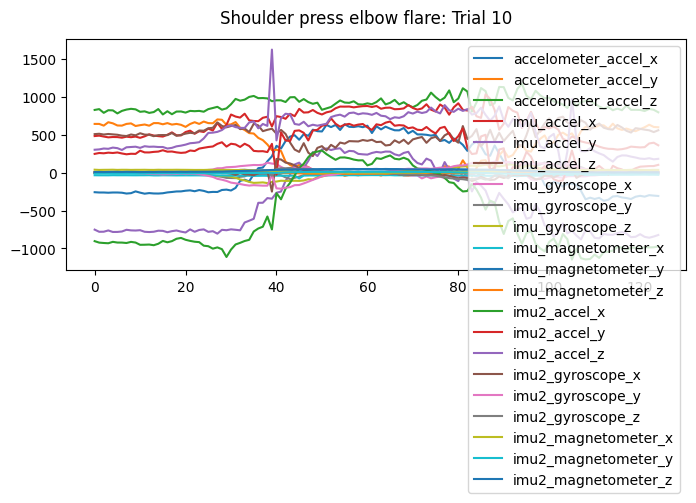

Shoulder press not full extension (10, 125, 21)


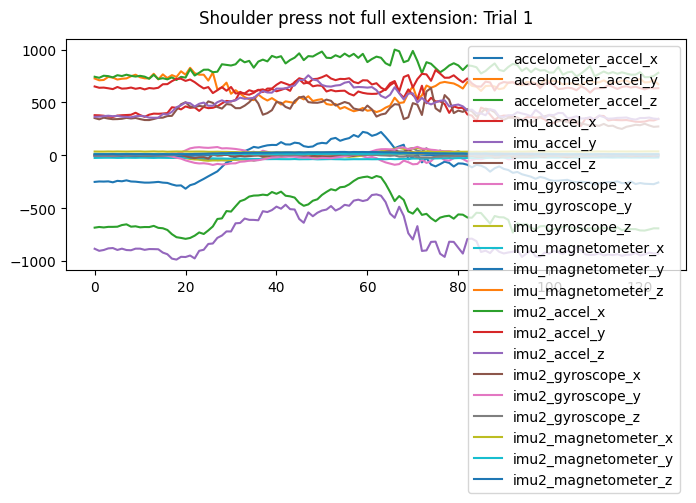

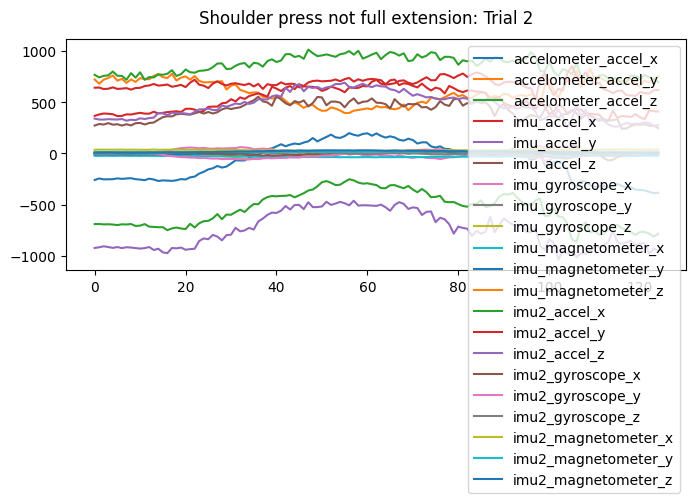

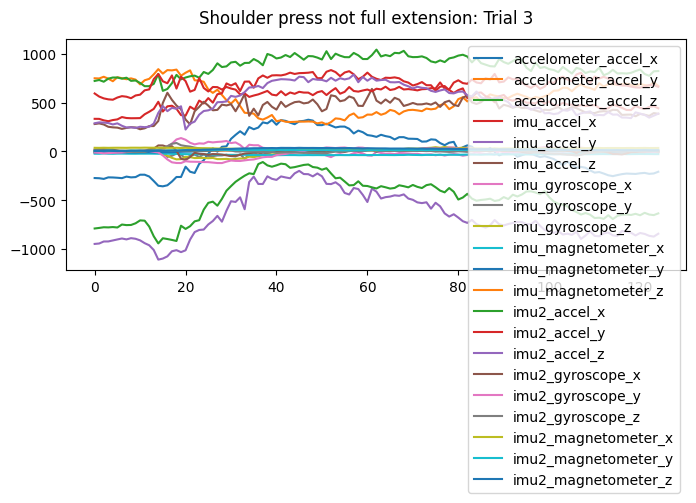

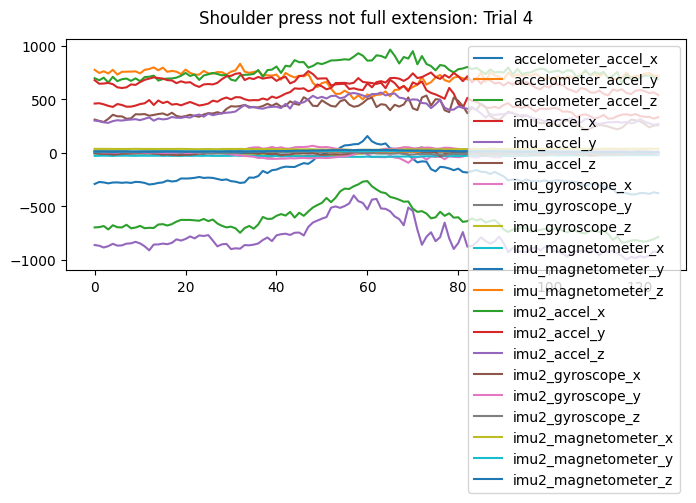

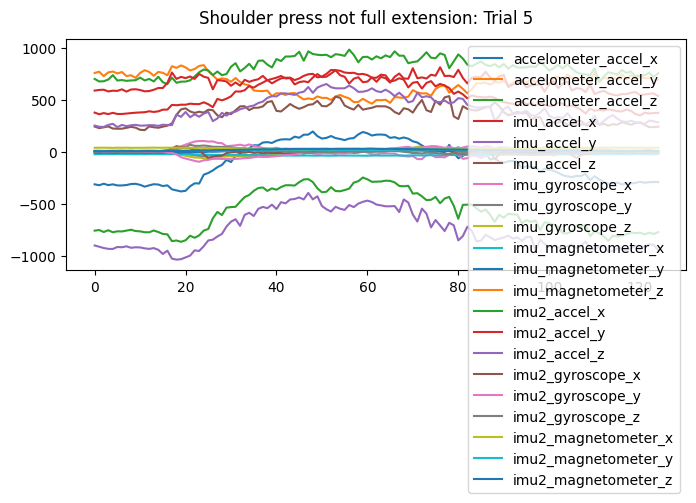

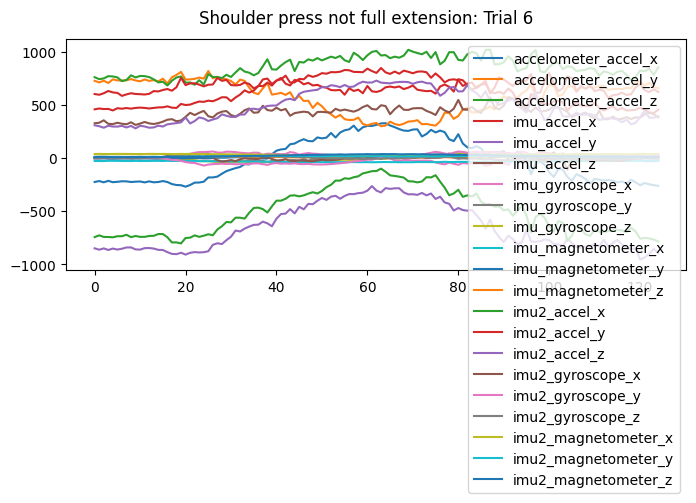

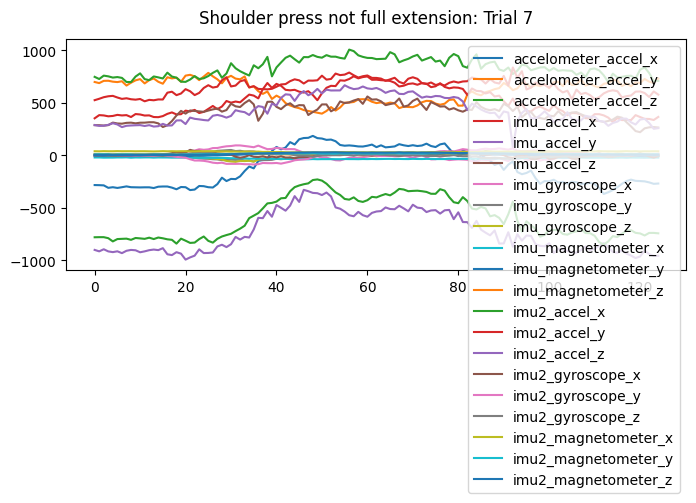

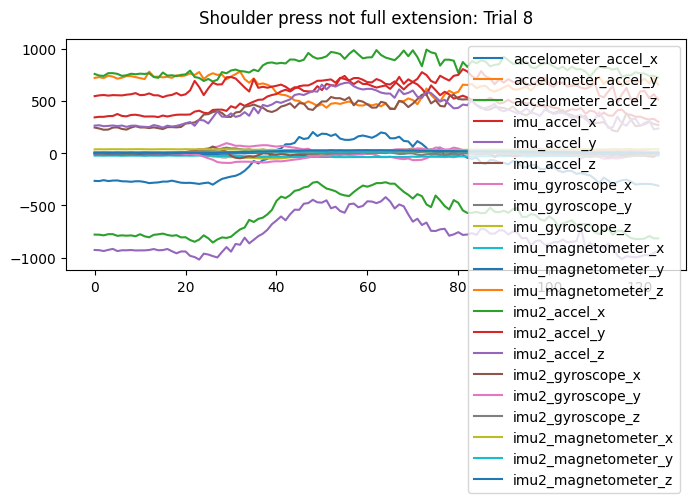

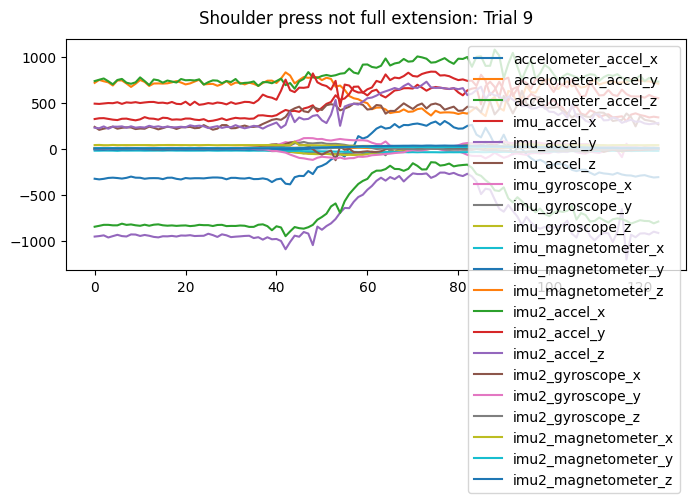

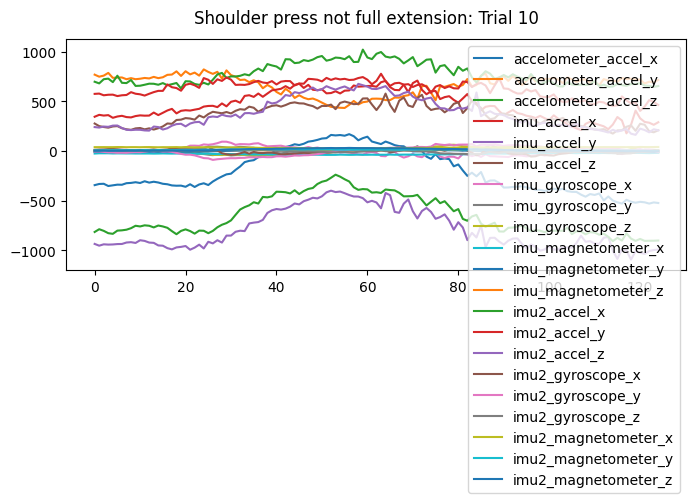

In [21]:
#Code to visualize the different classes
for gesture_key in data.item().keys():
    data_arr = np.array(data.item().get(gesture_key))
    print(gesture_key,data_arr.shape) # Array shape should be n_trials, n_samples, values
    for i in range(len(data_arr)):
        sensor_data = data_arr[i]
        fig, (ax1) = plt.subplots(1, 1,figsize=(8,3))
        fig.suptitle(gesture_key + ": Trial " + str(i+1))
        ax1.plot(sensor_data[:,0],label="accelometer_accel_x") # TODO: change these
        ax1.plot(sensor_data[:,1],label="accelometer_accel_y")
        ax1.plot(sensor_data[:,2],label="accelometer_accel_z")
        ax1.plot(sensor_data[:,3],label="imu_accel_x")
        ax1.plot(sensor_data[:,4],label="imu_accel_y")
        ax1.plot(sensor_data[:,5],label="imu_accel_z")
        ax1.plot(sensor_data[:,6],label="imu_gyroscope_x")
        ax1.plot(sensor_data[:,7],label="imu_gyroscope_y")
        ax1.plot(sensor_data[:,8],label="imu_gyroscope_z")
        ax1.plot(sensor_data[:,9],label="imu_magnetometer_x")
        ax1.plot(sensor_data[:,10],label="imu_magnetometer_y")
        ax1.plot(sensor_data[:,11],label="imu_magnetometer_z")
        ax1.plot(sensor_data[:,12],label="imu2_accel_x")
        ax1.plot(sensor_data[:,13],label="imu2_accel_y")
        ax1.plot(sensor_data[:,14],label="imu2_accel_z")
        ax1.plot(sensor_data[:,15],label="imu2_gyroscope_x")
        ax1.plot(sensor_data[:,16],label="imu2_gyroscope_y")
        ax1.plot(sensor_data[:,17],label="imu2_gyroscope_z")
        ax1.plot(sensor_data[:,18],label="imu2_magnetometer_x")
        ax1.plot(sensor_data[:,19],label="imu2_magnetometer_y")
        ax1.plot(sensor_data[:,20],label="imu2_magnetometer_z")
        ax1.legend()
        plt.show() 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

WINDOW_SIZE = 5

def median_filter(a):
    window_medians = sp.signal.medfilt(a, WINDOW_SIZE)
    # fig, (ax1) = plt.subplots(1, 1,figsize=(8,3))
    # ax1.plot(a,label="ax")
    # ax1.plot(window_medians,label="smooth_ax")
    # ax1.legend()
    # plt.show() 
    return window_medians

def plot_peaks(a, peaks, min, title):
    plt.plot(a)
    plt.title(title)
    [plt.axvline(p, c='C3', linewidth=0.3) for p in peaks[0]]
    [plt.axvline(m, c='C3', linewidth=0.5) for m in min[0]]
    plt.show()

def extract_ax(arr):
    return arr[:, 0:1].flatten()
def extract_ay(arr):
    return arr[:, 1:2].flatten()

# Returns tuple of arrays of x, y peaks
def get_extrema(ax, ay):
    neg_ax = np.negative(ax)
    neg_ay = np.negative(ay)
    ax_peaks = sp.signal.find_peaks(ax, prominence=0.4)
    ay_peaks = sp.signal.find_peaks(ay, prominence=0.4)
    ax_min = sp.signal.find_peaks(neg_ax, prominence=0.4)
    ay_min = sp.signal.find_peaks(neg_ay, prominence=0.4)
    # plot_peaks(ax, ax_peaks, ax_min, "Ax peaks")
    # plot_peaks(ay, ay_peaks, ay_min, "Ay peaks")
    return (ax_peaks, ax_min, ay_peaks, ay_min)

def get_prominence(ax, ax_peaks, ax_mins, ay, ay_peaks, ay_mins):
    neg_ax = np.negative(ax)
    neg_ay = np.negative(ay)
    ax_peak_prominence = sp.signal.peak_prominences(ax, ax_peaks[0])
    ay_peak_prominence = sp.signal.peak_prominences(ay, ay_peaks[0])
    ax_min_prominence = sp.signal.peak_prominences(neg_ax, ax_mins[0])
    ay_min_prominence = sp.signal.peak_prominences(neg_ay, ay_mins[0])
    return (ax_peak_prominence, ax_min_prominence, ay_peak_prominence, ay_min_prominence)

def get_feature_conditional(peaks, prominences, mode):
    if peaks[0].shape[0] == 0:
        return 0
    elif mode == 'AVG':
        return np.average(prominences[0])
    elif mode == 'SUM':
        return np.sum(prominences[0])
    elif peaks[0].shape[0] == 1 and mode == 'AVG-GAP':
        return 0
    elif mode == 'AVG-GAP':
        return np.average(np.diff(prominences[0]))

# Make changes here for the featurization code
def featurize(arr):
    fvec = np.std(arr,axis=0)
    #     fvec = arr.flatten() #Uncomment this to see the difference in performance
    return fvec
    # ### amy
	# ax = median_filter(extract_ax(arr))
	# ay = median_filter(extract_ay(arr))
	# (ax_peaks, ax_mins, ay_peaks, ay_mins) = get_extrema(ax, ay)
	# (ax_peak_prominence, ax_min_prominence, ay_peak_prominence, ay_min_prominence) = get_prominence(ax, ax_peaks, ax_mins, ay, ay_peaks, ay_mins)
	# fvec = []
	# fvec.append(ax_peaks[0].shape[0]) # number of ax peaks
	# fvec.append(ay_peaks[0].shape[0]) # number of ay peaks
	# fvec.append(get_feature_conditional(ax_peaks, ax_peak_prominence, 'AVG')) # average prominence of ax maxima
	# fvec.append(get_feature_conditional(ay_peaks, ay_peak_prominence, 'AVG')) # average prominence of ay maxima
	
	# ### nandini
	# X_cord = arr[:, 0]
	# Y_cord = arr[:, 1]
	# Z_cord = arr[:, 2]
	# X_fft = np.abs(fft(X_cord))
	# Y_fft = np.abs(fft(Y_cord))
	# Z_fft = np.abs(fft(Z_cord))
	# fv = []
	# fv.append(np.mean(X_fft))
	# fv.append(np.mean(Y_fft))
	# fv.append(np.mean(Z_fft))
	# fv.append(np.max(X_fft))
	# fv.append(np.max(Y_fft))
	
	# ### alejandro
	# features = []
	# # Standard Deviation
	# features.append(np.std(arr, axis=0))
	# # Mean of absolute values
	# features.append(np.mean(np.abs(arr), axis=0))
	# # Max-Min difference
	# features.append(np.max(arr, axis=0) - np.min(arr, axis=0))
	# # Sum of absolute values
	# features.append(np.sum(np.abs(arr), axis=0))
	# # Sum of squares
	# features.append(np.sum(np.square(arr), axis=0))
	# features = np.concatenate(features)

	# return np.concatenate((fvec,fv,features))

# gesture_dict = data.item()
# loo = LeaveOneOut()
# X = []
# Y = []
# for key in gesture_dict.keys():
#     gest_trials = gesture_dict[key]
#     for trial in gest_trials:
#         X.append(featurize(trial))
#         Y.append(key)
# X = np.array(X)
# Y = np.array(Y)

# classifiers = [SVC(kernel='poly'),KNeighborsClassifier(),RandomForestClassifier()]

# for clf_model in classifiers:
#     training_accuracy = []
#     accuracy = []
#     permutation_importances = []
#     for train_index, test_index in loo.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = Y[train_index], Y[test_index]
#         clf_model.fit(X_train, y_train)
#         # print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

#         result_train = permutation_importance(clf_model, X_train, y_train, n_repeats=20, random_state=42, n_jobs=2).importances_mean
#         # print(result_train, sorted_importances_idx_train)
#         permutation_importances.append(result_train)
    
#         training_accuracy.append(clf_model.score(X_train, y_train))
#         accuracy.append(clf_model.score(X_test, y_test))
#     print("Leave one trial out cross-val accuracy for",clf_model,"is", np.mean(accuracy))
#     print("Training accuracies of",clf_model,"is",training_accuracy)
#     print("Mean permutation importances", np.mean(permutation_importances, axis=0)) # TODO: check if this axis is correct
#     print("Features in order of importance:", np.mean(permutation_importances, axis=0).argsort())
#     # feature importance: https://towardsdatascience.com/best-practice-to-calculate-and-interpret-model-feature-importance-14f0e11ee660

gesture_dict = data.item()
X = []
Y = []

# Featurize and create X, Y
for key in gesture_dict.keys():
    gest_trials = gesture_dict[key]
    for trial in gest_trials:
        X.append(featurize(trial))
        Y.append(key)

X = np.array(X)
Y = np.array(Y)

# Define classifiers
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel='poly'),
    RandomForestClassifier()
]

# Train-test split instead of LOOCV
for clf_model in classifiers:
    accuracy = []
    for _ in range(10):  # Perform 10 train-test splits
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        clf_model.fit(X_train, y_train)
        accuracy.append(clf_model.score(X_test, y_test))
    print("Train-test split accuracy for", clf_model, "is", np.mean(accuracy))

Train-test split accuracy for KNeighborsClassifier() is 1.0
Train-test split accuracy for SVC(kernel='poly') is 1.0
Train-test split accuracy for RandomForestClassifier() is 1.0


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

classifiers = [KNeighborsClassifier(),SVC(kernel='poly'),RandomForestClassifier()]
loo = LeaveOneOut()

for clf_model in classifiers:
    accuracy = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        clf_model.fit(X_train, y_train)
        accuracy.append(clf_model.score(X_test, y_test))
    print("Leave one trial out cross-val accuracy for",clf_model,"is", np.mean(accuracy))

Leave one trial out cross-val accuracy for KNeighborsClassifier() is 0.9666666666666667
Leave one trial out cross-val accuracy for SVC(kernel='poly') is 1.0
Leave one trial out cross-val accuracy for RandomForestClassifier() is 0.9
